# Submission 2 &ndash; Intermediate Submission

## Instructions

- Fill out the *Basic Information* and the *Results* sections.
- Make sure that this `.ipynb` file displays correctly in the GitHub file preview, including any visual output.
- If you find that any output does not display correctly, include a static screenshot as an image. For interactive outputs, add a link to a short screencast located in your repository.
- Push all required files before the deadline.

$$ MCC = \frac{TP \cdot TN - FP \cdot FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}} ]

---
## Basic Information

**Team Name:** AI Creatives

**Team Members:**
- Bairam Kuliev
- Kilian Kourim
- Madhusudhan Dudapu
- Anton Sadeq

**Dataset Description:**  
(max. 75 words; this serves just as a reminder)

Our dataset is the Human Development Report with all composite indices over its complete time.
The dataset is about the development of nations from a sociological and economical standpoint. Its attributes are mostly composite indices, but there are also a few one dimensional attributes, which show the development over time for all the countries in the world. As a lot of development has happened in the last 40 years.

---

## Code

Here you may place any code that is not an immediate part of your submission. Only the content of the *Results* sections will be graded for this submission.

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import altair as alt
from sklearn.linear_model import LinearRegression

# Preprocessing the dataset:
np.random.seed(42)
file_path = r"C:\Users\anton\Downloads\visualization intermediate submission\HDR23-24_Composite_indices_complete_time_series.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1') 
usa = data.iloc[186]
korea = data.iloc[91]
usa_df = usa.to_frame().T 
korea_df = korea.to_frame().T

# Extract columns for USA and Korea using filtering
usa_lfpr_data = usa_df.filter(regex=r'lfpr_f_\d{4}')
usa_lfpr_m_data = usa_df.filter(regex=r'lfpr_m_\d{4}')
kor_lfpr_data = korea_df.filter(regex=r'lfpr_f_\d{4}')
kor_lfpr_m_data = korea_df.filter(regex=r'lfpr_m_\d{4}')
usa_gnipc_data = usa_df.filter(regex=r'gnipc_\d{4}')
kor_gnipc_data = korea_df.filter(regex=r'gnipc_\d{4}')

# Melt dataframes
kor_gnipc_data_melted = kor_gnipc_data.melt(var_name="Year", value_name="GNIPC")
usa_gnipc_data_melted = usa_gnipc_data.melt(var_name="Year", value_name="GNIPC")

kor_lfpr_data_melted = kor_lfpr_data.melt(var_name="Year", value_name="LFPR")
usa_lfpr_data_melted = usa_lfpr_data.melt(var_name="Year", value_name="LFPR")

# Add country labels
kor_gnipc_data_melted["Country"] = "Korea"
usa_gnipc_data_melted["Country"] = "USA"

# Combine GDI data
combined_gnipc_data = pd.concat([kor_gnipc_data_melted, usa_gnipc_data_melted], ignore_index=True)

# Extract numeric year part and convert to integer
combined_gnipc_data["Year"] = combined_gnipc_data["Year"].str.extract(r"(\d{4})").astype(int)

# Add country labels
kor_lfpr_data_melted["Country"] = "Korea"
usa_lfpr_data_melted["Country"] = "USA"

# Combine LFPR data
combined_lfpr_data = pd.concat([kor_lfpr_data_melted, usa_lfpr_data_melted], ignore_index=True)

# Extract numeric year part and convert to integer
combined_lfpr_data["Year"] = combined_lfpr_data["Year"].str.extract(r"(\d{4})").astype(int)

# Filter data based on year range for Korea and the USA
kor_gnipc_filtered = combined_gnipc_data[(combined_gnipc_data["Country"] == "Korea") &
                                         (combined_gnipc_data["Year"].between(1994, 2005))]
usa_gnipc_filtered = combined_gnipc_data[(combined_gnipc_data["Country"] == "USA") &
                                         (combined_gnipc_data["Year"].between(2005, 2019))]

kor_lfpr_filtered = combined_lfpr_data[(combined_lfpr_data["Country"] == "Korea") &
                                       (combined_lfpr_data["Year"].between(1994, 2005))]
usa_lfpr_filtered = combined_lfpr_data[(combined_lfpr_data["Country"] == "USA") &
                                       (combined_lfpr_data["Year"].between(2005, 2019))]

# Combine the filtered dataframes if needed
filtered_gnipc_data = pd.concat([kor_gnipc_filtered, usa_gnipc_filtered], ignore_index=True)
filtered_lfpr_data = pd.concat([kor_lfpr_filtered, usa_lfpr_filtered], ignore_index=True)


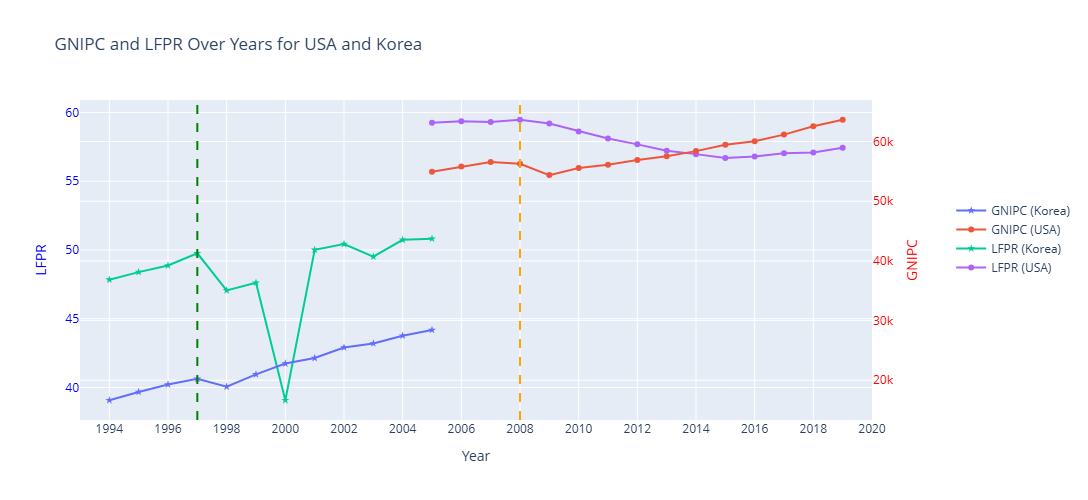

In [95]:
fig = go.Figure()

# Plot GNIPC data
for country in filtered_gnipc_data["Country"].unique():
    country_data = filtered_gnipc_data[filtered_gnipc_data["Country"] == country]
    fig.add_trace(go.Scatter(
        x=country_data["Year"],
        y=country_data["GNIPC"],
        mode='lines+markers',
        name=f"GNIPC ({country})",
        marker=dict(symbol="circle" if country == "USA" else "star"),
        yaxis="y2"
    ))

# Plot LFPR data
for country in filtered_lfpr_data["Country"].unique():
    country_data = filtered_lfpr_data[filtered_lfpr_data["Country"] == country]
    fig.add_trace(go.Scatter(
        x=country_data["Year"],
        y=country_data["LFPR"],
        mode='lines+markers',
        name=f"LFPR ({country})",
        marker=dict(symbol="circle" if country == "USA" else "star")
    ))

# Add vertical lines for 1997 (South Korea) and 2008 (USA)
fig.add_shape(
    type="line",
    x0=1997, x1=1997, y0=0, y1=1,
    line=dict(color="green", width=2, dash="dash"),
    xref="x", yref="paper"
)
fig.add_shape(
    type="line",
    x0=2008, x1=2008, y0=0, y1=1,
    line=dict(color="orange", width=2, dash="dash"),
    xref="x", yref="paper"
)

# Update x-axis to show all years explicitly
fig.update_layout(
    title="GNIPC and LFPR Over Years for USA and Korea",
    xaxis=dict(
        title="Year",
        tickmode="linear",
        dtick=2,  # Increment by 1 year
        range=[min(filtered_gnipc_data["Year"].min(), filtered_lfpr_data["Year"].min()) - 1, 
               max(filtered_gnipc_data["Year"].max(), filtered_lfpr_data["Year"].max()) + 1]
    ),
    yaxis=dict(title="LFPR", titlefont=dict(color="blue"), tickfont=dict(color="blue")),
    yaxis2=dict(
        title="GNIPC",
        titlefont=dict(color="red"),
        tickfont=dict(color="red"),
        anchor="x",
        overlaying="y",
        side="right"
    ),
    legend=dict(x=1.1, y=0.7),
    width=1000,
    height=500
)

# Show the plot
fig.show()


---
## Results &ndash; Simple Hypotheses/Tasks

### A.1

Restate your hypothesis/task below.

**Hypthesis/Task A.1:** TODO

Place your visualizations below (max. 2). Make sure that everyting displays correctly in the GitHub file preview.

In [ ]:
# TODO

Describe your visualizations and findings. Be clear which chart(s) you are referring to and relate your findings to the hypothesis/task.
Use no more than 150 words and indicate the word count of your description below.

**Description:** TODO

**Word count**: TODO

### A.2

Restate your hypothesis/task below.

**Hypthesis/Task A.2:** TODO

Place your visualizations below (max. 2). Make sure that everyting displays correctly in the GitHub file preview.

In [ ]:
# TODO

Describe your visualizations and findings. Be clear which chart(s) you are referring to and relate your findings to the hypothesis/task. Use no more than 150 words and indicate the word count of your description below.

**Description:** TODO

**Word count**: TODO